In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1번 모델 - 정규화

## 데이터 불러오기

In [ ]:
train_df = pd.read_csv('movies_train.csv')
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


### train+submission 데이터 병합

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## 데이터 전처리

불필요한 열 삭제

(숫자값열만 남겨봄)

In [ ]:
all_df.drop(columns= ["title",	"distributor",	"genre",	'release_time',	"screening_rat",	"director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            843 non-null    int64  
 1   dir_prev_bfnum  377 non-null    float64
 2   dir_prev_num    843 non-null    int64  
 3   num_staff       843 non-null    int64  
 4   num_actor       843 non-null    int64  
 5   box_off_num     600 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 46.1 KB


결측치 처리

In [ ]:
all_df = all_df.fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            843 non-null    int64  
 1   dir_prev_bfnum  843 non-null    float64
 2   dir_prev_num    843 non-null    int64  
 3   num_staff       843 non-null    int64  
 4   num_actor       843 non-null    int64  
 5   box_off_num     843 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 46.1 KB


### 전처리 전 데이터 분포

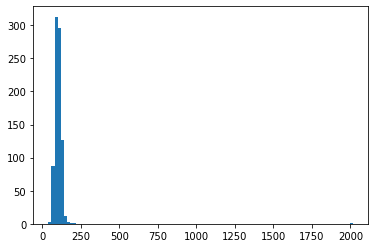

In [ ]:
# time
plt.hist(all_df.time, bins=100)
plt.show()
# 200보다 큰 값 200으로 바꿔줌

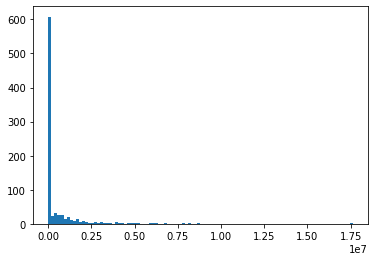

In [ ]:
# dir_prev_bfnum
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()
# log처리

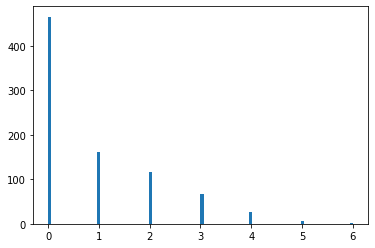

In [ ]:
# dir_prev_num
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

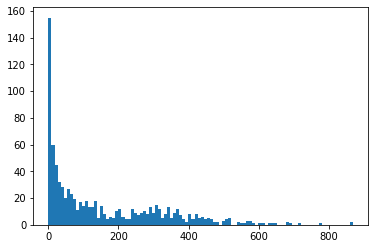

In [ ]:
# num_staff
plt.hist(all_df.num_staff, bins=100)
plt.show()
# log처리

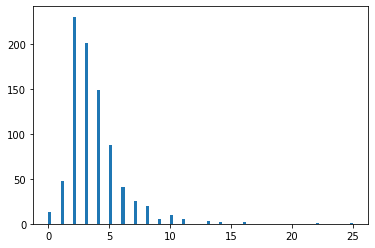

In [ ]:
# num_actor
plt.hist(all_df.num_actor, bins=100)
plt.show()
# 10보다 큰 값은 10으로 바꿔줌

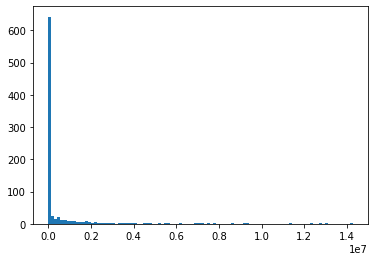

In [ ]:
# box_off_num
plt.hist(all_df.box_off_num, bins=100)
plt.show()
# log처리

## 컬럼별 전처리

In [ ]:
# time 
# 200보다 큰 값 200으로 바꿔줌
all_df.loc[all_df.time > 200, "time"] = 200

In [ ]:
# dir_prev_bfnum
# 1을 더한 log처리
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

In [ ]:
# num_staff
# log처리
all_df['num_staff'] = np.log1p(all_df.num_staff)

In [ ]:
# num_actor
# 10보다 큰 값 10으로 바꿔줌
all_df.loc[all_df.num_actor > 10, "num_actor"] = 10

In [ ]:
# box_off_num
# log처리
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

### 정규화

In [ ]:
all_df['time'] = (all_df.time - all_df.time.min()) / (all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum'] = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / (all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num'] = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / (all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff'] = (all_df.num_staff - all_df.num_staff.min()) / (all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor'] = (all_df.num_actor - all_df.num_actor.min()) / (all_df.num_actor.max() - all_df.num_actor.min())

box_off_num값은 따로 처리

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / (y_max - y_min)

### 전처리 후 데이터 분포

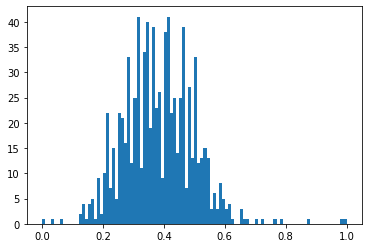

In [ ]:
# time
plt.hist(all_df.time, bins=100)
plt.show()

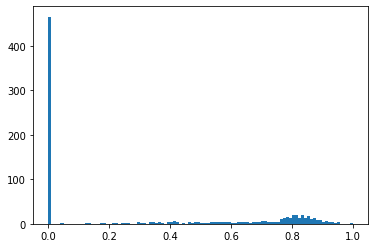

In [ ]:
# dir_prev_bfnum
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

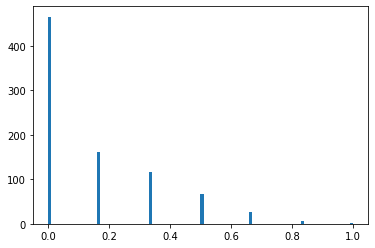

In [ ]:
# dir_prev_num
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

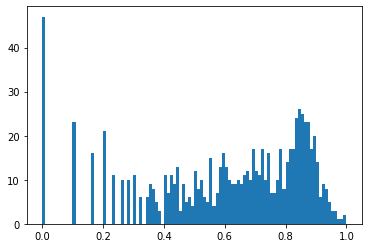

In [ ]:
# num_staff
plt.hist(all_df.num_staff, bins=100)
plt.show()

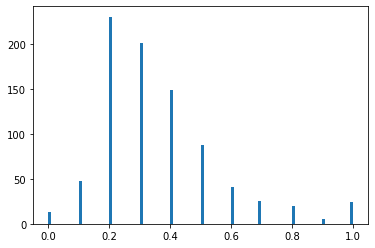

In [ ]:
# num_actor
plt.hist(all_df.num_actor, bins=100)
plt.show()

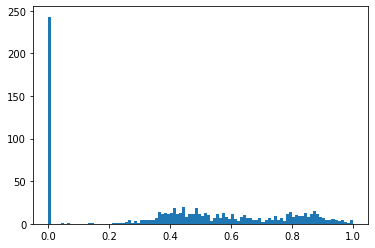

In [ ]:
# box_off_num
plt.hist(all_df.box_off_num, bins=100)
plt.show()

train, test, submission 데이터 분리

In [ ]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


x, y 로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()

print(submission_x.shape)

(500, 5)
(500,)
(100, 5)
(100,)
(243, 5)


## 딥러닝 학습

학습이 되는지만 빠른시간에 알기위해 epochs를 줄여줌

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 10)                60        
                                                                 
 dense_52 (Dense)            (None, 10)                110       
                                                                 
 dense_53 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


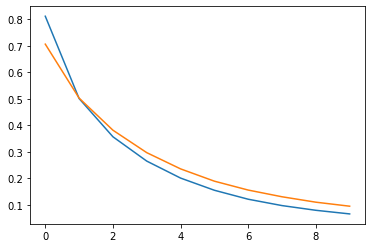

4/4 [==============================] - 0s 4ms/step - loss: 0.0607 - mape: 26.5453
loss= 0.060687001794576645
mape= 26.545333862304688


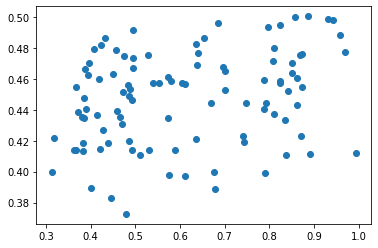

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(5,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

16/16 [==============================] - 0s 2ms/step - loss: 0.0628 - mape: 32.3164
loss= 0.06280715018510818
mape= 32.31637191772461


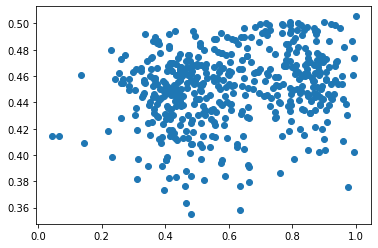

In [ ]:
# train데이터 학습확인
loss, mape = model.evaluate(train_x, train_y)
print("loss=", loss)
print("mape=", mape)

y_train = model.predict(train_x)

plt.scatter(train_y, y_train)
plt.show()

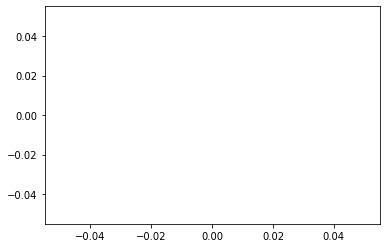

In [ ]:
# loss 추세 확인
plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.show()

loss 떨어지는 추세 확인

### RMSE 계산하기

rmse =  tf.Tensor(1952272.8, shape=(), dtype=float32)


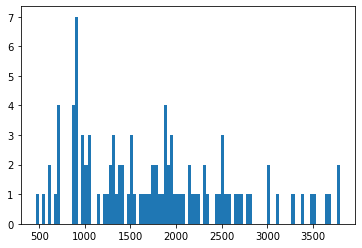

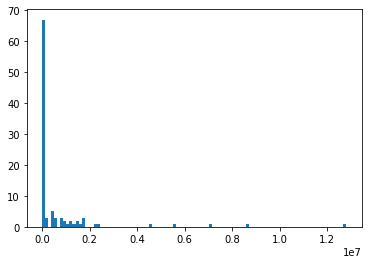

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

predicted = y_ * (y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * (y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()

## 예측하기

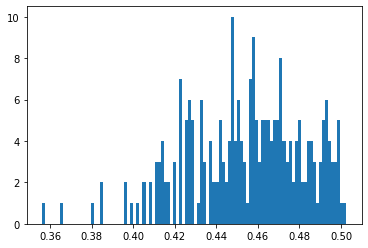

In [ ]:
predicted = model.predict(submission_x)

plt.hist(predicted, bins=100)
plt.show()

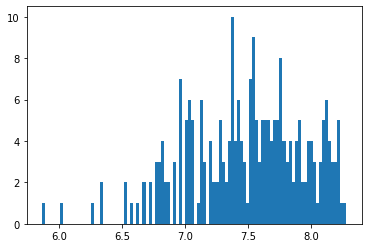

In [ ]:
predicted = predicted * (y_max - y_min) + y_min

plt.hist(predicted, bins=100)
plt.show()

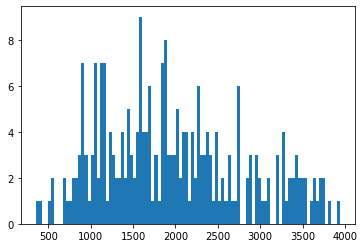

In [ ]:
predicted = np.exp(predicted) -1.

plt.hist(predicted, bins=100)
plt.show()

submission 파일 만들기

In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [ ]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,1866
1,아빠가 여자를 좋아해,2115
2,하모니,1148
3,의형제,2256
4,평행 이론,2287


In [ ]:
final_df.to_csv("submission.csv", index=False)

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,1866
아빠가 여자를 좋아해,2115
하모니,1148
의형제,2256
평행 이론,2287
회오리 바람,3275
경계도시 2,1642
이웃집 남자,1978
아마존의 눈물 극장판,2855


# 2번 모델 - 카테고리 변수 추가 

## 데이터 불러오기

In [ ]:
train_df = pd.read_csv('movies_train.csv')
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


### train+submission 데이터 병합

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## 데이터 전처리

카테고리 데이터 인코딩

In [ ]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

카테고리 데이터 one-hot 인코딩

In [ ]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 232 entries, title to screening_rat_code_3
dtypes: category(3), float64(2), int64(4), object(3), uint8(220)
memory usage: 262.5+ KB


불필요한 열 삭제

In [ ]:
all_df.drop(columns= ["title",	"distributor",	"genre",	'release_time',	"screening_rat",	"director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 226 entries, time to screening_rat_code_3
dtypes: float64(2), int64(4), uint8(220)
memory usage: 227.2 KB


결측치 처리

In [ ]:
all_df = all_df.fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 226 entries, time to screening_rat_code_3
dtypes: float64(2), int64(4), uint8(220)
memory usage: 227.2 KB


### 전처리 전 데이터 분포

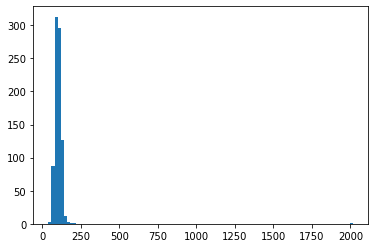

In [ ]:
# time
plt.hist(all_df.time, bins=100)
plt.show()
# 200보다 큰 값 200으로 바꿔줌

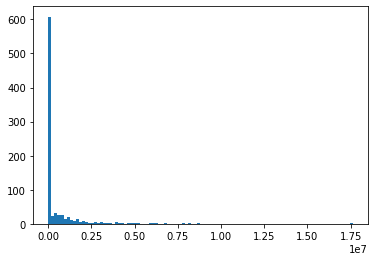

In [ ]:
# dir_prev_bfnum
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()
# log처리

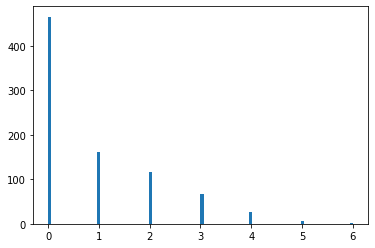

In [ ]:
# dir_prev_num
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

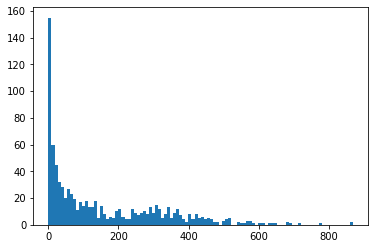

In [ ]:
# num_staff
plt.hist(all_df.num_staff, bins=100)
plt.show()
# log처리

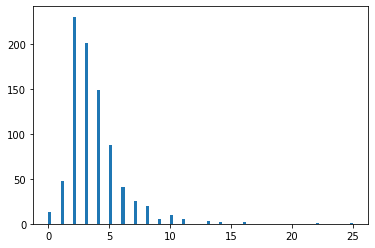

In [ ]:
# num_actor
plt.hist(all_df.num_actor, bins=100)
plt.show()
# 10보다 큰 값은 10으로 바꿔줌

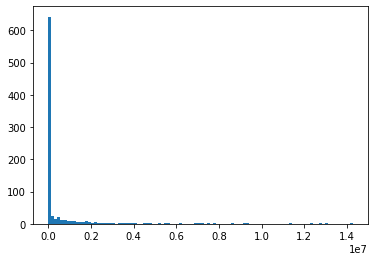

In [ ]:
# box_off_num
plt.hist(all_df.box_off_num, bins=100)
plt.show()
# log처리

## 컬럼별 전처리

In [ ]:
# time 
# 200보다 큰 값 200으로 바꿔줌
all_df.loc[all_df.time > 200, "time"] = 200

In [ ]:
# dir_prev_bfnum
# 1을 더한 log처리
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

In [ ]:
# num_staff
# log처리
all_df['num_staff'] = np.log1p(all_df.num_staff)

In [ ]:
# num_actor
# 10보다 큰 값 10으로 바꿔줌
all_df.loc[all_df.num_actor > 10, "num_actor"] = 10

In [ ]:
# box_off_num
# log처리
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

### 정규화

In [ ]:
all_df['time'] = (all_df.time - all_df.time.min()) / (all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum'] = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / (all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num'] = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / (all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff'] = (all_df.num_staff - all_df.num_staff.min()) / (all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor'] = (all_df.num_actor - all_df.num_actor.min()) / (all_df.num_actor.max() - all_df.num_actor.min())

box_off_num값은 따로 처리

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / (y_max - y_min)

### 전처리 후 데이터 분포

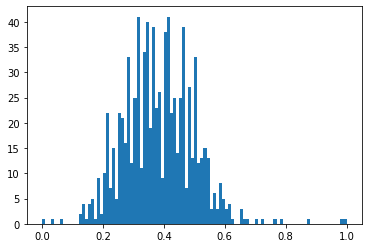

In [ ]:
# time
plt.hist(all_df.time, bins=100)
plt.show()

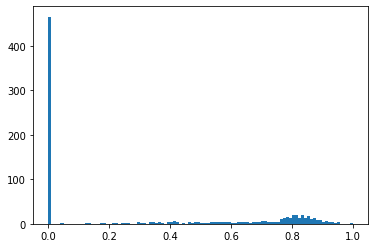

In [ ]:
# dir_prev_bfnum
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

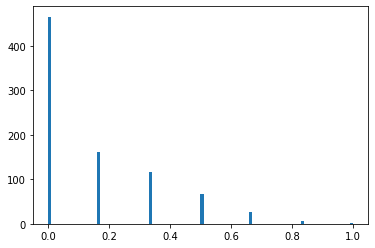

In [ ]:
# dir_prev_num
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

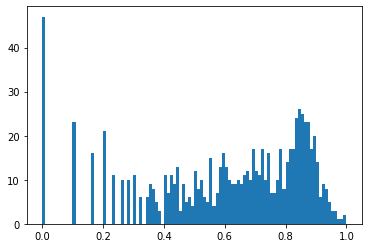

In [ ]:
# num_staff
plt.hist(all_df.num_staff, bins=100)
plt.show()

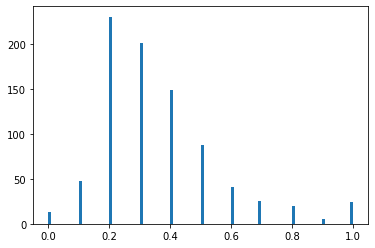

In [ ]:
# num_actor
plt.hist(all_df.num_actor, bins=100)
plt.show()

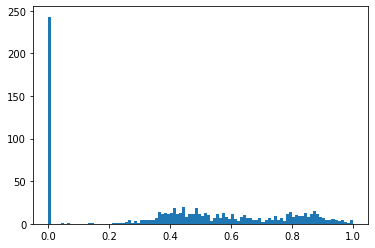

In [ ]:
# box_off_num
plt.hist(all_df.box_off_num, bins=100)
plt.show()

train, test, submission 데이터 분리

In [ ]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


x, y 로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()

print(submission_x.shape)

(500, 225)
(500,)
(100, 225)
(100,)
(243, 225)


## 딥러닝 학습

빠르게 돌리기위해 epochs를 줄여준 상태

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 10)                2260      
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,381
Trainable params: 2,381
Non-trainable params: 0
_________________________________________________________________


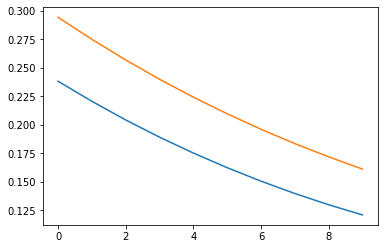

4/4 [==============================] - 0s 3ms/step - loss: 0.1355 - mape: 46.4667
loss= 0.1354898065328598
mape= 46.466739654541016


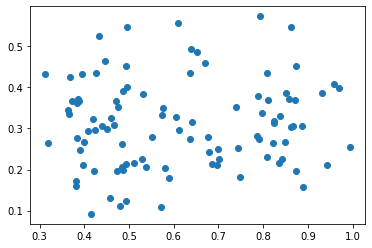

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, batch_size=2048, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

16/16 [==============================] - 0s 2ms/step - loss: 0.1174 - mape: 46.5818
loss= 0.11740794777870178
mape= 46.581756591796875


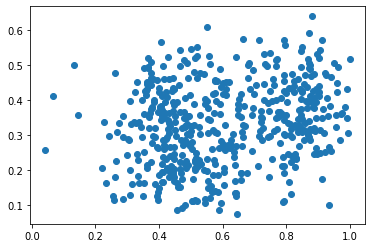

In [ ]:
# train데이터 학습확인
loss, mape = model.evaluate(train_x, train_y)
print("loss=", loss)
print("mape=", mape)

y_train = model.predict(train_x)

plt.scatter(train_y, y_train)
plt.show()

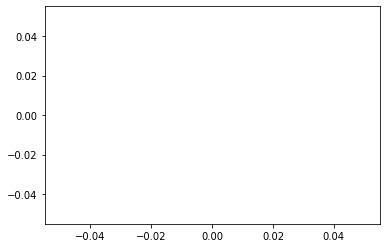

In [ ]:
# loss 추세 확인
plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.show()

loss 떨어지는 추세 확인

### RMSE 계산하기

rmse =  tf.Tensor(1952836.4, shape=(), dtype=float32)


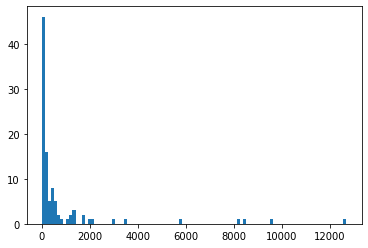

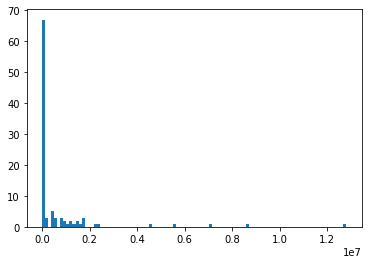

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

predicted = y_ * (y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * (y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()

## 예측하기

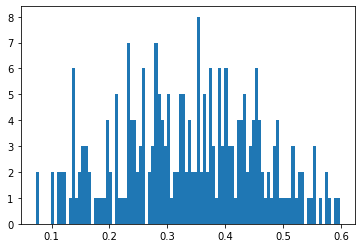

In [ ]:
predicted = model.predict(submission_x)

plt.hist(predicted, bins=100)
plt.show()

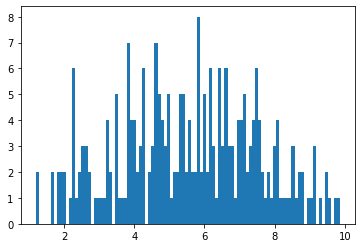

In [ ]:
predicted = predicted * (y_max - y_min) + y_min

plt.hist(predicted, bins=100)
plt.show()

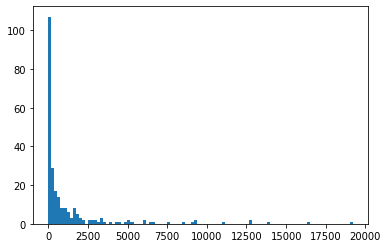

In [ ]:
predicted = np.exp(predicted) -1.

plt.hist(predicted, bins=100)
plt.show()

submission 파일 만들기

In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [ ]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,2116
1,아빠가 여자를 좋아해,1850
2,하모니,11018
3,의형제,210
4,평행 이론,55


In [ ]:
final_df.to_csv("submission.csv", index=False)

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,2116
아빠가 여자를 좋아해,1850
하모니,11018
의형제,210
평행 이론,55
회오리 바람,47
경계도시 2,8
이웃집 남자,1457
아마존의 눈물 극장판,18


# 3번 모델 - release_time 추가

## 데이터 불러오기

In [ ]:
train_df = pd.read_csv('movies_train.csv')
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


### train+submission 데이터 병합

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## 데이터 전처리

### release_time 값 조정

일별 시간을 월별 시간으로 바꿔줌

'2021-12-31' 같은 값을 '2021-12'로 변경

In [ ]:
print(all_df.release_time[:5])
all_df['release_time'] = all_df.release_time.str[:7]
print(all_df.release_time[:5])

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object
0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object


카테고리 데이터 인코딩

In [ ]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

카테고리 데이터 one-hot 인코딩

In [ ]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])
all_df = pd.get_dummies(all_df, columns = ['release_time_code'])

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 304 entries, title to release_time_code_71
dtypes: category(4), float64(2), int64(4), object(2), uint8(292)
memory usage: 319.0+ KB


불필요한 열 삭제

In [ ]:
all_df.drop(columns= ["title",	"distributor",	"genre",	'release_time',	"screening_rat",	"director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 298 entries, time to release_time_code_71
dtypes: float64(2), int64(4), uint8(292)
memory usage: 286.5 KB


결측치 처리

In [ ]:
all_df = all_df.fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 298 entries, time to release_time_code_71
dtypes: float64(2), int64(4), uint8(292)
memory usage: 286.5 KB


### 전처리 전 데이터 분포

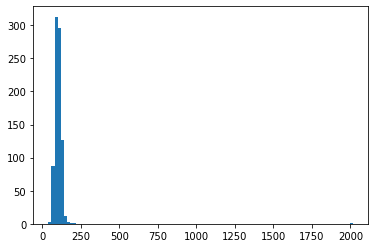

In [ ]:
# time
plt.hist(all_df.time, bins=100)
plt.show()
# 200보다 큰 값 200으로 바꿔줌

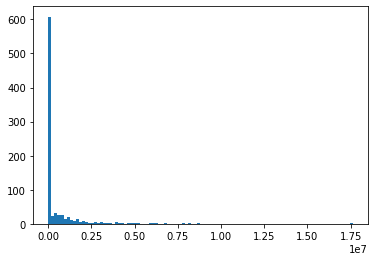

In [ ]:
# dir_prev_bfnum
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()
# log처리

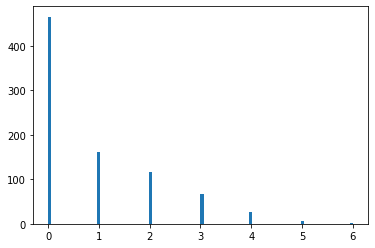

In [ ]:
# dir_prev_num
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

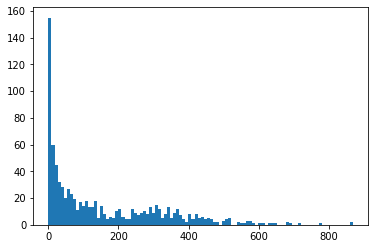

In [ ]:
# num_staff
plt.hist(all_df.num_staff, bins=100)
plt.show()
# log처리

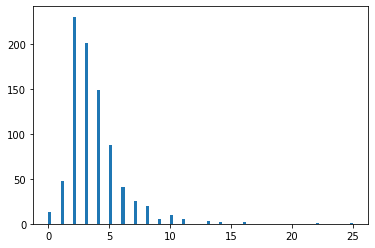

In [ ]:
# num_actor
plt.hist(all_df.num_actor, bins=100)
plt.show()
# 10보다 큰 값은 10으로 바꿔줌

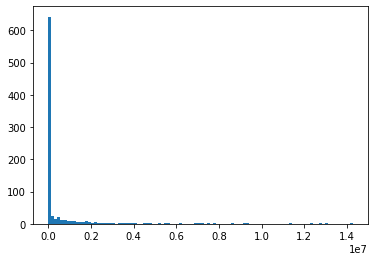

In [ ]:
# box_off_num
plt.hist(all_df.box_off_num, bins=100)
plt.show()
# log처리

## 컬럼별 전처리

In [ ]:
# time 
# 200보다 큰 값 200으로 바꿔줌
all_df.loc[all_df.time > 200, "time"] = 200

In [ ]:
# dir_prev_bfnum
# 1을 더한 log처리
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

In [ ]:
# num_staff
# log처리
all_df['num_staff'] = np.log1p(all_df.num_staff)

In [ ]:
# num_actor
# 10보다 큰 값 10으로 바꿔줌
all_df.loc[all_df.num_actor > 10, "num_actor"] = 10

In [ ]:
# box_off_num
# log처리
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

### 정규화

In [ ]:
all_df['time'] = (all_df.time - all_df.time.min()) / (all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum'] = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / (all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num'] = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / (all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff'] = (all_df.num_staff - all_df.num_staff.min()) / (all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor'] = (all_df.num_actor - all_df.num_actor.min()) / (all_df.num_actor.max() - all_df.num_actor.min())

box_off_num값은 따로 처리

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / (y_max - y_min)

### 전처리 후 데이터 분포

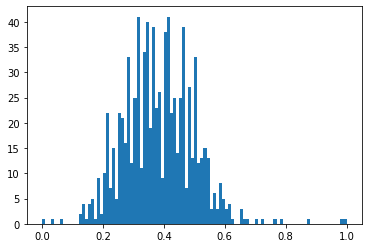

In [ ]:
# time
plt.hist(all_df.time, bins=100)
plt.show()

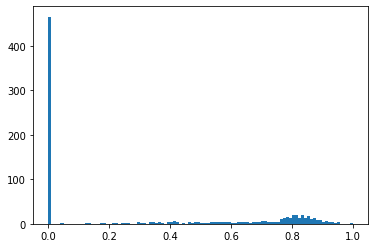

In [ ]:
# dir_prev_bfnum
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

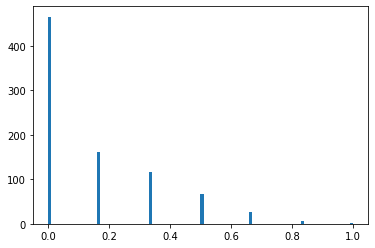

In [ ]:
# dir_prev_num
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

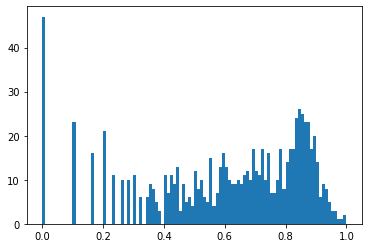

In [ ]:
# num_staff
plt.hist(all_df.num_staff, bins=100)
plt.show()

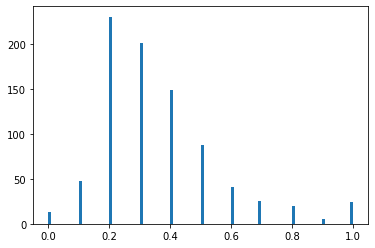

In [ ]:
# num_actor
plt.hist(all_df.num_actor, bins=100)
plt.show()

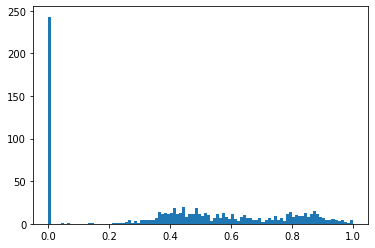

In [ ]:
# box_off_num
plt.hist(all_df.box_off_num, bins=100)
plt.show()

train, test, submission 데이터 분리

In [ ]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


x, y 로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()

print(submission_x.shape)

(500, 297)
(500,)
(100, 297)
(100,)
(243, 297)


## 딥러닝 학습

빠르게 돌리기위해 epochs를 줄여준 상태

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 10)                2980      
                                                                 
 dense_58 (Dense)            (None, 10)                110       
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


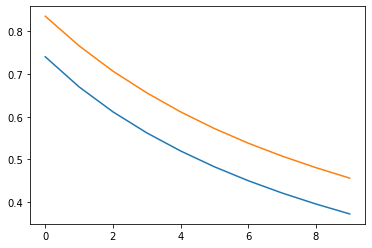

4/4 [==============================] - 0s 4ms/step - loss: 0.3626 - mape: 90.4013
loss= 0.36261001229286194
mape= 90.4012680053711


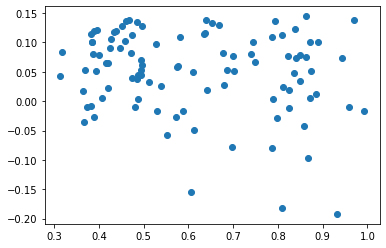

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, batch_size=2048, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

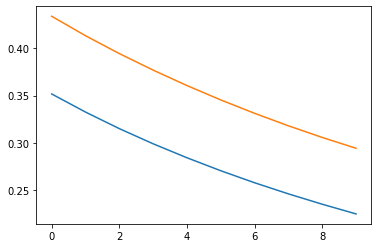

In [ ]:
# 추가 학습
history = model.fit(train_x, train_y, epochs=10, verbose=0, batch_size=2048, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

16/16 [==============================] - 0s 2ms/step - loss: 0.2230 - mape: 65.8289
loss= 0.22297701239585876
mape= 65.82891082763672


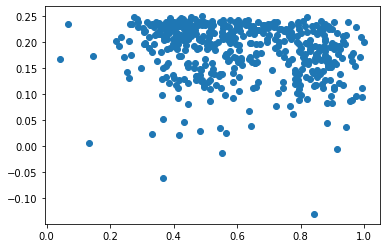

In [ ]:
# train데이터 학습확인
loss, mape = model.evaluate(train_x, train_y)
print("loss=", loss)
print("mape=", mape)

y_train = model.predict(train_x)

plt.scatter(train_y, y_train)
plt.show()

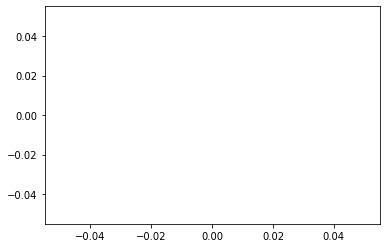

In [ ]:
# loss 추세확인
plt.plot(history.history['loss'][50:], color= 'r')
plt.plot(history.history['val_loss'][50:])
plt.show()

### RMSE 계산하기

rmse =  tf.Tensor(1953054.9, shape=(), dtype=float32)


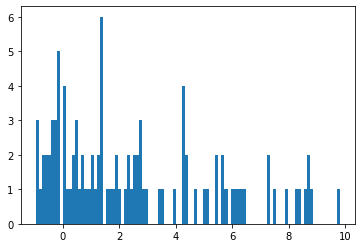

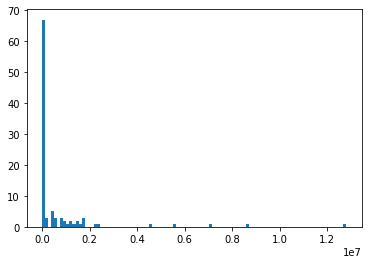

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

predicted = y_ * (y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * (y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()

## 예측하기

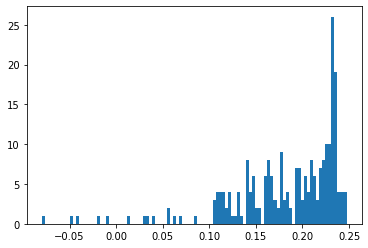

In [ ]:
predicted = model.predict(submission_x)

plt.hist(predicted, bins=100)
plt.show()

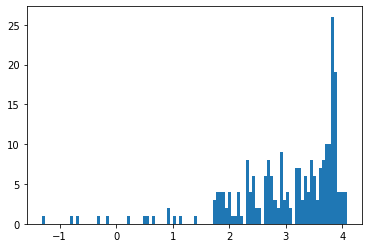

In [ ]:
predicted = predicted * (y_max - y_min) + y_min

plt.hist(predicted, bins=100)
plt.show()

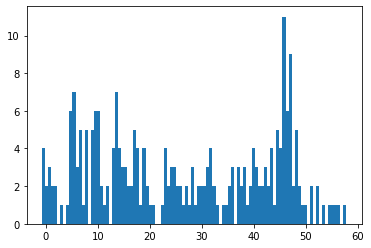

In [ ]:
predicted = np.exp(predicted) -1.

plt.hist(predicted, bins=100)
plt.show()

submission 파일 만들기

In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [ ]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,13
1,아빠가 여자를 좋아해,0
2,하모니,12
3,의형제,5
4,평행 이론,15


In [ ]:
final_df.to_csv("submission.csv", index=False)

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,13
아빠가 여자를 좋아해,0
하모니,12
의형제,5
평행 이론,15
회오리 바람,32
경계도시 2,7
이웃집 남자,39
아마존의 눈물 극장판,24


# 4번 모델 - 3번 + director 추가

## 데이터 불러오기

In [ ]:
train_df = pd.read_csv('movies_train.csv')
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
submission_df = pd.read_csv('movies_test.csv')
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


### train+submission 데이터 병합

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## 데이터 전처리

### release_time 값 조정

일별 시간을 월별 시간으로 바꿔줌

'2021-12-31' 같은 값을 '2021-12'로 변경

In [ ]:
print(all_df.release_time[:5])
all_df['release_time'] = all_df.release_time.str[:7]
print(all_df.release_time[:5])

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object
0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object


director 카테고리화

In [ ]:
print(len(all_df.director.unique()))

all_df.loc[all_df.dir_prev_num == 0, "director"] = "무명감독"
print(len(all_df.director.unique()))

614
291


카테고리 데이터 인코딩

In [ ]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

all_df.director = all_df.director.astype('category')
all_df['director_code'] = all_df.director.cat.codes

카테고리 데이터 one-hot 인코딩

In [ ]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])
all_df = pd.get_dummies(all_df, columns = ['release_time_code'])
all_df = pd.get_dummies(all_df, columns = ['director_code'])

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 595 entries, title to director_code_290
dtypes: category(5), float64(2), int64(4), object(1), uint8(583)
memory usage: 565.9+ KB


불필요한 열 삭제

In [ ]:
all_df.drop(columns= ["title",	"distributor",	"genre",	'release_time',	"screening_rat",	"director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 589 entries, time to director_code_290
dtypes: float64(2), int64(4), uint8(583)
memory usage: 526.1 KB


결측치 처리

In [ ]:
all_df = all_df.fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 589 entries, time to director_code_290
dtypes: float64(2), int64(4), uint8(583)
memory usage: 526.1 KB


### 전처리 전 데이터 분포

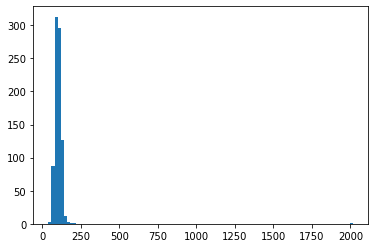

In [ ]:
# time
plt.hist(all_df.time, bins=100)
plt.show()
# 200보다 큰 값 200으로 바꿔줌

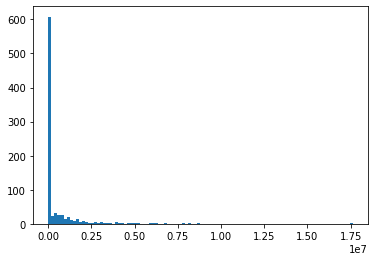

In [ ]:
# dir_prev_bfnum
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()
# log처리

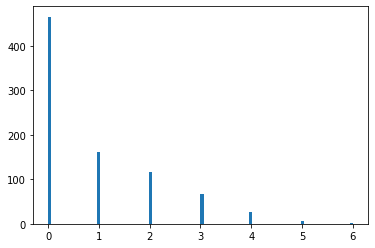

In [ ]:
# dir_prev_num
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

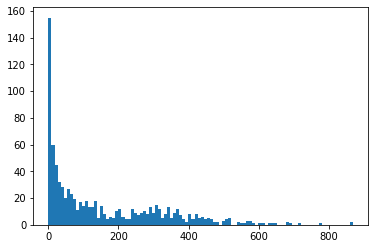

In [ ]:
# num_staff
plt.hist(all_df.num_staff, bins=100)
plt.show()
# log처리

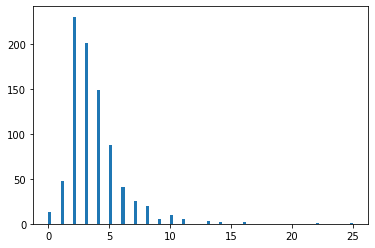

In [ ]:
# num_actor
plt.hist(all_df.num_actor, bins=100)
plt.show()
# 10보다 큰 값은 10으로 바꿔줌

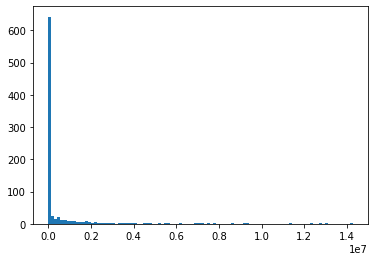

In [ ]:
# box_off_num
plt.hist(all_df.box_off_num, bins=100)
plt.show()
# log처리

## 컬럼별 전처리

In [ ]:
# time 
# 200보다 큰 값 200으로 바꿔줌
all_df.loc[all_df.time > 200, "time"] = 200

In [ ]:
# dir_prev_bfnum
# 1을 더한 log처리
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

In [ ]:
# num_staff
# log처리
all_df['num_staff'] = np.log1p(all_df.num_staff)

In [ ]:
# num_actor
# 10보다 큰 값 10으로 바꿔줌
all_df.loc[all_df.num_actor > 10, "num_actor"] = 10

In [ ]:
# box_off_num
# log처리
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

### 정규화

In [ ]:
all_df['time'] = (all_df.time - all_df.time.min()) / (all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum'] = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / (all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num'] = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / (all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff'] = (all_df.num_staff - all_df.num_staff.min()) / (all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor'] = (all_df.num_actor - all_df.num_actor.min()) / (all_df.num_actor.max() - all_df.num_actor.min())

box_off_num값은 따로 처리

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / (y_max - y_min)

### 전처리 후 데이터 분포

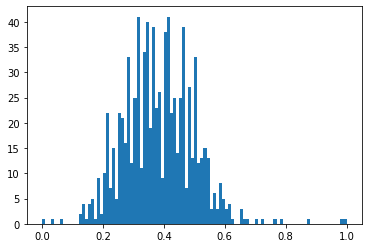

In [ ]:
# time
plt.hist(all_df.time, bins=100)
plt.show()

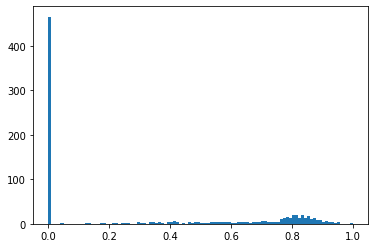

In [ ]:
# dir_prev_bfnum
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

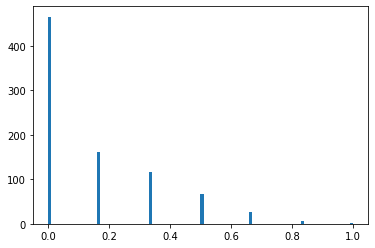

In [ ]:
# dir_prev_num
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

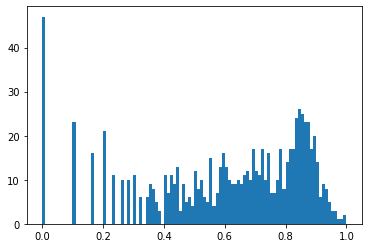

In [ ]:
# num_staff
plt.hist(all_df.num_staff, bins=100)
plt.show()

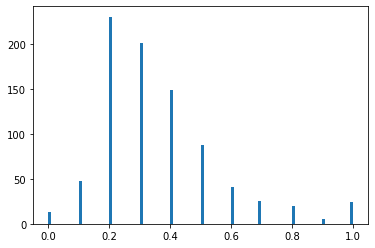

In [ ]:
# num_actor
plt.hist(all_df.num_actor, bins=100)
plt.show()

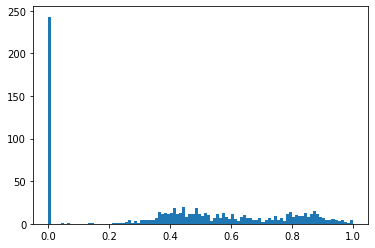

In [ ]:
# box_off_num
plt.hist(all_df.box_off_num, bins=100)
plt.show()

train, test, submission 데이터 분리

In [ ]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))

500
100
243


x, y 로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()

print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()

print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()

print(submission_x.shape)

(500, 588)
(500,)
(100, 588)
(100,)
(243, 588)


## 딥러닝 학습
첫번째 dense값 256으로 바꿔줌

빠르게 돌리기위해 epochs를 줄여준 상태

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 256)               150784    
                                                                 
 dense_73 (Dense)            (None, 256)               65792     
                                                                 
 dense_74 (Dense)            (None, 1)                 257       
                                                                 
Total params: 216,833
Trainable params: 216,833
Non-trainable params: 0
_________________________________________________________________


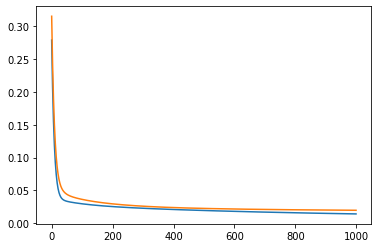

4/4 [==============================] - 0s 3ms/step - loss: 0.0187 - mape: 18.7990
loss= 0.018742594867944717
mape= 18.798952102661133


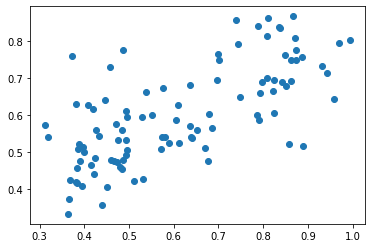

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=2048, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

In [ ]:
# # 추가 학습
# history = model.fit(train_x, train_y, epochs=4000, verbose=0, batch_size=2048, validation_split=0.1)

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.show()

16/16 [==============================] - 0s 2ms/step - loss: 0.0147 - mape: 21.3650
loss= 0.014729784801602364
mape= 21.364999771118164


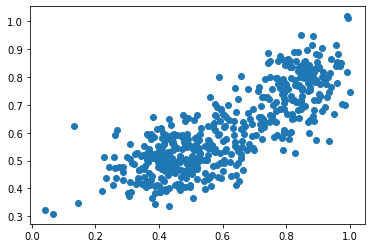

In [ ]:
# train데이터 학습확인
loss, mape = model.evaluate(train_x, train_y)
print("loss=", loss)
print("mape=", mape)

y_train = model.predict(train_x)

plt.scatter(train_y, y_train)
plt.show()

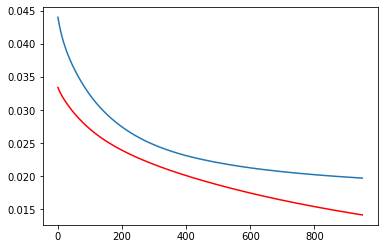

In [ ]:
# loss 추세확인
plt.plot(history.history['loss'][50:], color= 'r')
plt.plot(history.history['val_loss'][50:])
plt.show()

### RMSE 계산하기

rmse =  tf.Tensor(1858690.6, shape=(), dtype=float32)


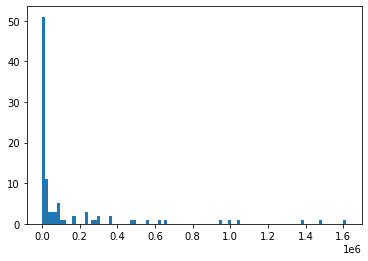

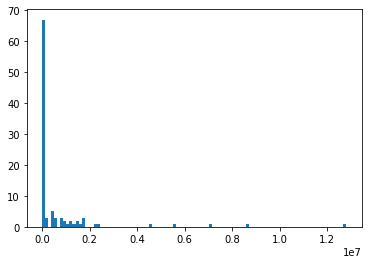

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

predicted = y_ * (y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * (y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()

## 예측하기

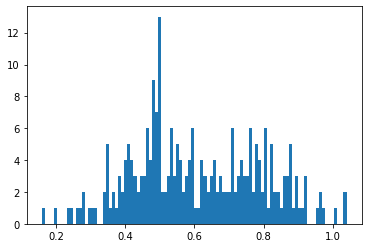

In [ ]:
predicted = model.predict(submission_x)

plt.hist(predicted, bins=100)
plt.show()

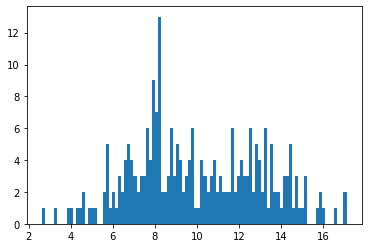

In [ ]:
predicted = predicted * (y_max - y_min) + y_min

plt.hist(predicted, bins=100)
plt.show()

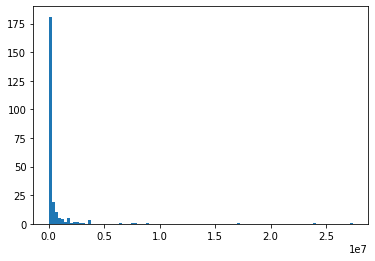

In [ ]:
predicted = np.exp(predicted) -1.

plt.hist(predicted, bins=100)
plt.show()

submission 파일 만들기

In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [ ]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,950164
1,아빠가 여자를 좋아해,1580978
2,하모니,7789691
3,의형제,3215846
4,평행 이론,574863


In [ ]:
final_df.to_csv("submission.csv", index=False)

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,950164
아빠가 여자를 좋아해,1580978
하모니,7789691
의형제,3215846
평행 이론,574863
회오리 바람,14589
경계도시 2,5754
이웃집 남자,3540
아마존의 눈물 극장판,2599


# 참고 batch_size 고르는 법

In [ ]:
import time

for batch_size in [16, 32, 64, 128, 256, 512, 512*2, 512*4, 512*8, 512*16]:
  start = time.time()
  history = model.fit(train_x, train_y, epochs=4, verbose=0, batch_size=batch_size, validation_split=0.1)
  print("batch_size", ":", time.time() - start)

batch_size : 0.6827332973480225
batch_size : 0.2855515480041504
batch_size : 0.19623351097106934
batch_size : 0.18107128143310547
batch_size : 0.17878437042236328
batch_size : 0.14970111846923828
batch_size : 0.14250659942626953
batch_size : 0.1906580924987793
batch_size : 0.14224886894226074
batch_size : 0.14893269538879395
